In [3]:
%matplotlib inline
import numpy as np
from skimage import io
from matplotlib import pylab as plt

In [23]:
def bresenham(x1, y1, x2, y2, img):
    x = x1
    y = y1
    sumOfLine = 0
    count = 0
    if x1 < x2:
        xi = 1
        dx = x2 - x1
    else:
        xi = -1
        dx = x1 - x2

    if y1 < y2:
        yi = 1
        dy = y2 - y1
    else:
        yi = -1
        dy = y1 - y1

    sumOfLine += img[x, y]
    count += 1
    if dx > dy:
        ai = (dy - dx) * 2
        bi = dy * 2
        d = bi - dx
        while x != x2:
            if d >= 0:
                x += xi
                y += yi
                d += ai
            else:
                x += xi
                d += bi
            sumOfLine += img[x, y]
            count += 1
    else:
        ai = (dx - dy) * 2
        bi = dx * 2
        d = bi - dy
        while y != y2:
            if d >= 0:
                x += xi
                y += yi
                d += ai
            else:
                y += yi
                d += bi
            sumOfLine += img[x, y]
            count += 1

    return sumOfLine/count

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


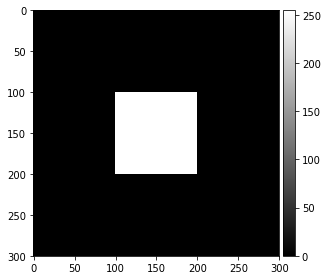

In [13]:
square_size = 300
square = np.zeros((square_size,square_size), dtype=np.float64)
square[round(square_size/3):round(2*square_size/3), round(square_size/3):round(2*square_size/3)] = 255
io.imshow(square, cmap='gray')

In [29]:
# Przyrost katów inc_angle emitera (położenie emitera), kąt z jakim wysyłane są fale (emiter_angle)
inc_angle, emiter_angle = 5, 15
beta = emiter_angle/2
centre = int(square_size/2)
detectors = 10

sinogram = np.zeros((int(360/inc_angle),detectors)

#petla - kazda pozycja emitera
for angle in range(0, 360, inc_angle):
    emiter_x = int(np.cos(angle) * (centre-5)) + centre
    emiter_y = int(np.sin(angle) * (centre-5)) + centre
    #square[emiter_x, emiter_y] = 255
    #petla - kazda pozycja detektora
    for a in range(detectors):
        alfa = angle + 180 - beta/2 + a*beta/(detectors-1)
        det_x = int(np.cos(alfa) * (centre-2) + centre)
        det_y = int(np.sin(alfa) * (centre-2) + centre)
        
        #bresenham
        suma = bresenham(emiter_x, emiter_y, det_x, det_y, square)
        sinogram[int(angle/inc_angle),a] = suma
        #print(suma)
print( sinogram)
print(square[0,0])
#io.imshow(sinogram, cmap='gray')

TypeError: data type not understood